In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
NUM_TRIALS = 100000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [3]:
class Bandit:
    def __init__(self, p):
        self.p = p
        self.a = 1
        self.b = 1
        self.N = 0 # for information only

    def pull(self):
        return np.random.random() < self.p
    
    def sample(self):
        return np.random.beta(self.a, self.b)

    def update(self, x):
        self.a += x
        self.b += 1 - x
        self.N += 1

In [4]:
def run_experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    rewards = np.empty(NUM_TRIALS)

    for i in range(NUM_TRIALS):
        j = np.argmax([b.sample() for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)

        # for the plot
        rewards[i] = x
        
    cumulative_average = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)
    
    return cumulative_average

In [5]:
c = run_experiment()

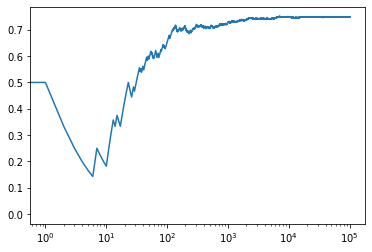

In [6]:
plt.plot(c)
plt.xscale('log')

In [ ]:
len(selected_bandits)

In [ ]:
sum(selected_bandits == 0)

In [ ]:
sum(selected_bandits == 1)

In [ ]:
sum(selected_bandits == 2)